In [1]:
import sys
sys.path.append('../')

import os
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env
from agents import Group
from agent import Agent
from utilities.tools import web_search

### Talk

 
[2024-12-13 15:25:59][INFO]: All agents are fully connected


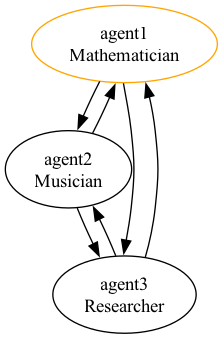

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician", 
              description="Transfer to me if you need help with math.", 
              dify_access_token=os.environ.get("AGENT1_ACCESS_TOKEN"),
              verbose=True),

        Agent(name="agent2", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              model_client=model_client,
              verbose=True),

        Agent(name="agent3", 
              role="Researcher",
              description="Transfer to me if you need help with research some specific topic.",
              model_client=model_client,
              tools=[web_search],
              verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

In [4]:
_ = g.talk("What can you guys as a group do?")

 
[2024-12-13 14:47:56][INFO]: User input (talk): What can you guys as a group do?
 
[2024-12-13 14:47:57][INFO]: handoff from agent1 to agent3 by using auto2 mode
 
[2024-12-13 14:47:58][INFO]: Calling OpenAI agent [agent3]
 
[2024-12-13 14:48:01][INFO]: Agent agent3 response:

As a group, we can collaborate on various interdisciplinary projects. For instance:

- **Mathematics and Music**: Agent1 (the Mathematician) can explore mathematical concepts that relate to musical theory, such as rhythms, scales, and patterns, while Agent2 (the Musician) can apply these concepts to compositions or performances.

- **Research and Analysis**: Agent3 (the Researcher) can conduct in-depth research on topics related to mathematics or music, providing valuable insights and data to support the work of Agent1 and Agent2.

- **Workshops and Publications**: We can create workshops or write papers that discuss the interplay between mathematics and music, aiming to educate and inspire others in both field

In [5]:
_ = g.talk("Can you explain the concept of complex numbers?")

 
[2024-12-13 14:48:05][INFO]: User input (talk): Can you explain the concept of complex numbers?
 
[2024-12-13 14:48:06][INFO]: handoff from agent3 to agent1 by using auto2 mode
 
[2024-12-13 14:48:07][INFO]: Calling Dify agent [agent1]
 
[2024-12-13 14:48:22][INFO]: Agent agent1 response:

Complex numbers are numbers that consist of a real part and an imaginary part. They are typically expressed in the form \( a + bi \), where:

- \( a \) is the real part,
- \( b \) is the imaginary part,
- \( i \) is the imaginary unit, defined by the property \( i^2 = -1 \).

### Key Concepts:

1. **Real Part and Imaginary Part**: In the complex number \( a + bi \), \( a \) is the real part, and \( b \) is the coefficient of the imaginary part.

2. **Imaginary Unit**: The imaginary unit \( i \) allows for the square roots of negative numbers to be defined. For example, \( \sqrt{-1} = i \).

3. **Complex Plane**: Complex numbers can be represented graphically on a plane known as the complex plane, w

In [6]:
_ = g.talk("introduction to llm agent")

 
[2024-12-13 14:48:24][INFO]: User input (talk): introduction to llm agent
 
[2024-12-13 14:48:26][INFO]: handoff from agent1 to agent3 by using auto2 mode
 
[2024-12-13 14:48:27][INFO]: Calling OpenAI agent [agent3]
 
[2024-12-13 14:48:28][INFO]: Tool Call [web_search] with arguments: {'max_results': 10, 'query': 'introduction to llm agent', 'timelimit': 'm'} by agent3
 
[2024-12-13 14:48:30][INFO]: Tool Call [web_search] Result Received
 
[2024-12-13 14:48:30][INFO]: All Tool Calls Completed, Process All Tool Call Results
 
[2024-12-13 14:48:38][INFO]: Agent agent3 response:

### Introduction to LLM Agents

**Large Language Model (LLM) Agents** are advanced AI systems that utilize large language models as their core components, enabling them to understand and generate human-like responses. These agents are designed to perform specific tasks, automate workflows, and interact with users in natural language, thereby enhancing various applications across different sectors.

#### Key Fea

### Task

 
[2024-12-13 15:26:03][INFO]: All agents are fully connected


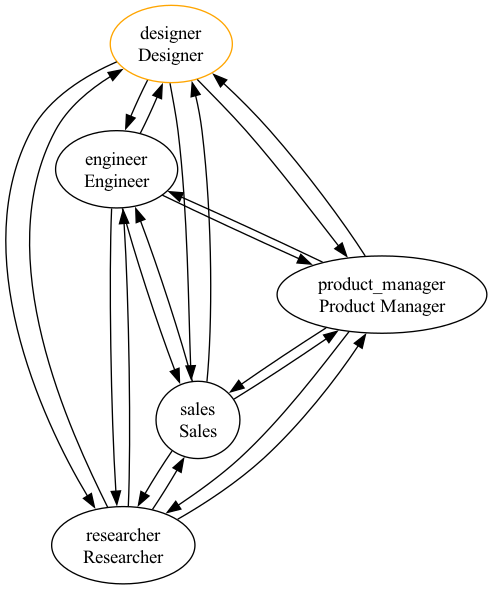

In [3]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="You are entrepreneurs building a new product. Now is December 2024",
    members=[
        Agent(name = "designer",
              role = "Designer", 
              description = "Transfer to me if you need help with design.",
              model_client = model_client,
              verbose = True),

        Agent(name="engineer",
              role="Engineer",
              description="Transfer to me if you need help with engineering.",
              model_client=model_client,                
              verbose=True),

        Agent(name="researcher",
                role="Researcher",
                description="Transfer to me if you need help with research.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="sales",
                role="Sales",
                description="Transfer to me if you need help with sales.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

      Agent(name="product_manager",
                  role="Product Manager",
                  description="Transfer to me if you need help with product management.",
                  model_client=model_client,
                  verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)
Image(g.draw_relations())

In [4]:
_ = g.task("I want to build a simplistic and user-friendly bicycle in 2025, can you write a bussiness plan for me?",model="gpt-4o-mini",strategy="auto")

 
[2024-12-13 15:26:04][INFO]: Start planning the task
 
[2024-12-13 15:26:18][INFO]: Planning finished
 
[2024-12-13 15:26:18][INFO]: Initial plan is 

{"agent_name":"product_manager","task":"Draft the executive summary of the business plan outlining the vision for the bicycle.","receive_information_from":[]}
{"agent_name":"researcher","task":"Gather market research data on current trends and consumer preferences related to bicycles.","receive_information_from":[]}
{"agent_name":"engineer","task":"Outline the design specifications and technical features for the bicycle.","receive_information_from":[]}
{"agent_name":"designer","task":"Create initial design prototypes and visual concepts for the bicycle.","receive_information_from":["engineer"]}
{"agent_name":"sales","task":"Develop a marketing strategy based on the collected market research data.","receive_information_from":["researcher"]}
{"agent_name":"product_manager","task":"Compile all sections into a cohesive business plan docume

### More Example

 
[2024-12-13 15:28:13][INFO]: All agents are fully connected


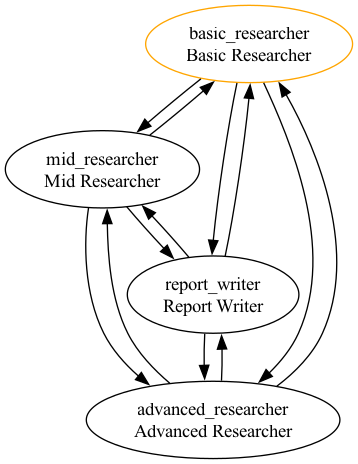

In [5]:
from utilities.tools import web_search
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="You are a group of researchers working on a project. Now is December 2024",
    members=[
        Agent(name="basic_researcher",
                role="Basic Researcher",
                description="Transfer to me if you need help with basic research.",
                backstory="You are a basic researcher who can do basic research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="mid_researcher",
                role="Mid Researcher",
                description="Transfer to me if you have done some basic research and need help with mid-level research.",
                backstory="You are a mid-level researcher who can do mid-level research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

        Agent(name="advanced_researcher",
                role="Advanced Researcher",
                description="Transfer to me if you have done some mid-level research and need help with advanced research.",
                backstory="You are an advanced researcher who can do advanced research on any topic.",
                model_client=model_client,
                tools=[web_search],
                verbose=True),

      Agent(name="report_writer",
                  role="Report Writer",
                  description="Transfer to me if you need help with writing reports.",
                  backstory="You are a report writer who can write reports on any topic.",
                  model_client=model_client,
                  verbose=True),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)
Image(g.draw_relations())

#### Talk to the group

In [10]:
_ = g.talk("introduction to multi agent framework?")

 
[2024-12-13 14:50:26][INFO]: User input (talk): introduction to multi agent framework?
 
[2024-12-13 14:50:27][INFO]: handoff from basic_researcher to mid_researcher by using auto2 mode
 
[2024-12-13 14:50:29][INFO]: Calling OpenAI agent [mid_researcher]
 
[2024-12-13 14:50:31][INFO]: Tool Call [web_search] with arguments: {'query': 'introduction to multi-agent framework', 'timelimit': 'm', 'max_results': 5} by mid_researcher
 
[2024-12-13 14:50:37][INFO]: Tool Call [web_search] Result Received
 
[2024-12-13 14:50:37][INFO]: All Tool Calls Completed, Process All Tool Call Results
 
[2024-12-13 14:50:47][INFO]: Agent mid_researcher response:

### Introduction to Multi-Agent Frameworks

Multi-agent frameworks are systems where multiple intelligent agents interact and collaborate in a shared environment to achieve collective goals. These agents can communicate, negotiate, and make decisions either independently or cooperatively, which allows for complex problem-solving and dynamic task 

In [11]:
_ = g.talk("show me a list of research papers on multi agent framework.")

 
[2024-12-13 14:50:52][INFO]: User input (talk): show me a list of research papers on multi agent framework.
 
[2024-12-13 14:50:53][INFO]: handoff from mid_researcher to basic_researcher by using auto2 mode
 
[2024-12-13 14:50:57][INFO]: Calling OpenAI agent [basic_researcher]
 
[2024-12-13 14:50:58][INFO]: Tool Call [web_search] with arguments: {'max_results': 10, 'query': 'multi-agent framework research papers', 'timelimit': 'y'} by basic_researcher
 
[2024-12-13 14:51:01][INFO]: Tool Call [web_search] Result Received
 
[2024-12-13 14:51:01][INFO]: All Tool Calls Completed, Process All Tool Call Results
 
[2024-12-13 14:51:11][INFO]: Agent basic_researcher response:

Here is a list of research papers on multi-agent frameworks:

1. **[Large Language Model based Multi-Agents: A Survey of Progress and Challenges](https://arxiv.org/abs/2402.01680)**
   - Authors: Taicheng Guo, Xiuying Chen, Yaqi Wang, Ruidi Chang, Shichao Pei, Nitesh V. Chawla, Olaf Wiest, Xiangliang Zhang
   - Abstrac

In [12]:
_ = g.talk("can you go deeper into the topic of multi agent framework?")

 
[2024-12-13 14:51:31][INFO]: User input (talk): can you go deeper into the topic of multi agent framework?
 
[2024-12-13 14:51:33][INFO]: handoff from basic_researcher to mid_researcher by using auto2 mode
 
[2024-12-13 14:51:33][INFO]: Calling OpenAI agent [mid_researcher]
 
[2024-12-13 14:51:35][INFO]: Tool Call [web_search] with arguments: {'query': 'multi-agent frameworks in literature review', 'timelimit': 'm', 'max_results': 10} by mid_researcher
 
[2024-12-13 14:51:39][INFO]: Tool Call [web_search] Result Received
 
[2024-12-13 14:51:39][INFO]: All Tool Calls Completed, Process All Tool Call Results
 
[2024-12-13 14:51:52][INFO]: Agent mid_researcher response:

To delve deeper into the topic of multi-agent frameworks, the following aspects could be explored, along with some relevant research papers that address them:

1. **Hierarchical Multi-Agent Systems**:
   - The paper **[HMSC-LLMs: A Hierarchical Multi-Agent Service Composition Method Based on Large Language Models](https

#### let's do some tasks

In [7]:
_ = g.task("write a report about llm multi agent must include the history, applications,popular framework,and future of the topic.",model="gpt-4o-mini",strategy="auto")

 
[2024-12-13 15:30:53][INFO]: Start planning the task
 
[2024-12-13 15:30:56][INFO]: Planning finished
 
[2024-12-13 15:30:56][INFO]: Initial plan is 

{"agent_name":"basic_researcher","task":"Conduct basic research on the history of LLM multi-agent systems and summarize key milestones.","receive_information_from":[]}
{"agent_name":"mid_researcher","task":"Investigate the current applications of LLM multi-agent systems, providing examples in various industries.","receive_information_from":["basic_researcher"]}
{"agent_name":"advanced_researcher","task":"Research popular frameworks used in LLM multi-agent systems and evaluate their features and usability.","receive_information_from":[]}
{"agent_name":"report_writer","task":"Compile the findings from the researchers into a comprehensive report, including sections on history, applications, frameworks, and future prospects.","receive_information_from":["basic_researcher","mid_researcher","advanced_researcher"]}
 
[2024-12-13 15:30:56][INF